<a href="https://colab.research.google.com/github/wmalevich/ds_course/blob/main/hw_1(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("TSLA.csv", parse_dates = True, index_col = "Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


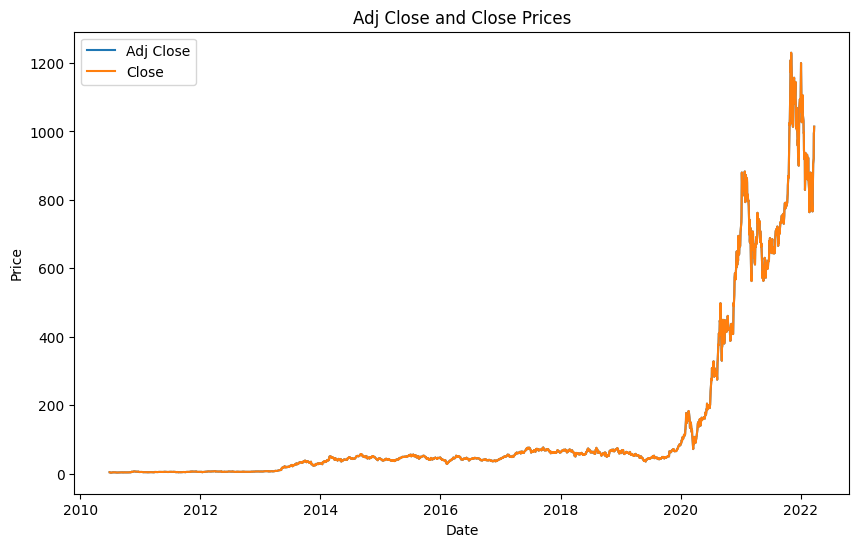

In [89]:
plt.figure(figsize=(10, 6))

plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(df['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Adj Close and Close Prices')
plt.legend()

plt.show()

In [90]:
df = df.drop('Adj Close', axis=1)

In [91]:
df.shape

(2956, 5)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2956 non-null   float64
 1   High    2956 non-null   float64
 2   Low     2956 non-null   float64
 3   Close   2956 non-null   float64
 4   Volume  2956 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 138.6 KB


In [93]:
df.describe()

,Open,High,Low,Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,3.046940e+08


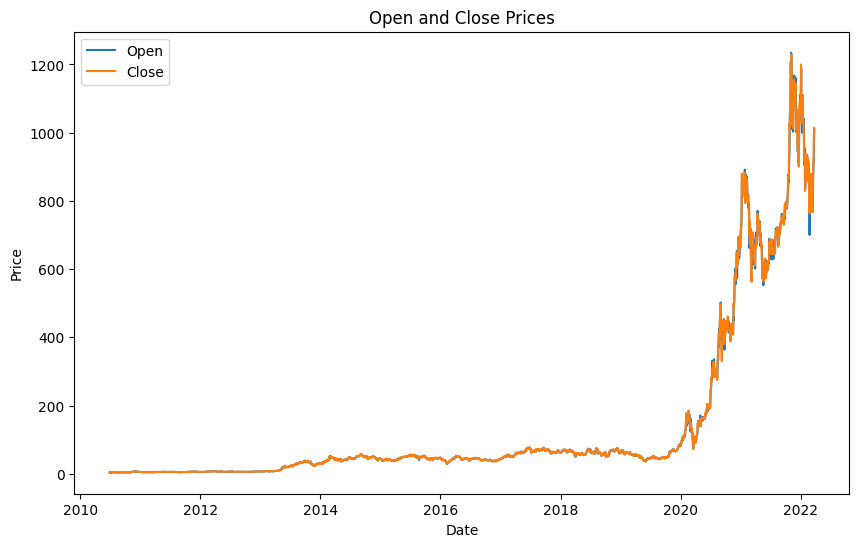

In [94]:
plt.figure(figsize=(10, 6))

plt.plot(df['Open'], label='Open')
plt.plot(df['Close'], label='Close')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open and Close Prices')
plt.legend()

plt.show()

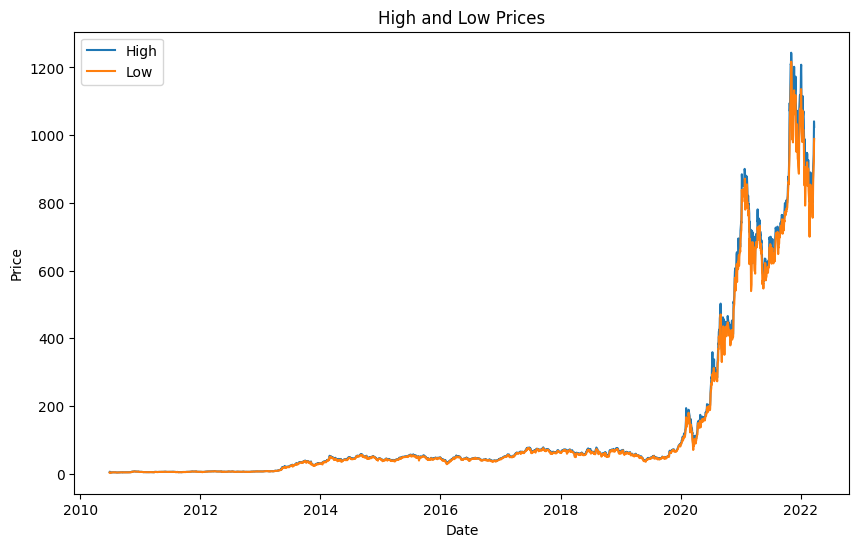

In [95]:
plt.figure(figsize=(10, 6))

plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('High and Low Prices')
plt.legend()

plt.show()

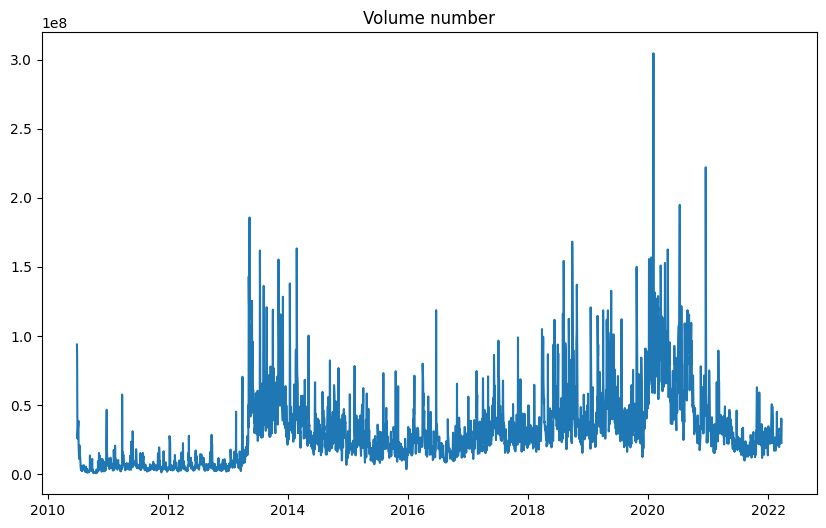

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(df['Volume'])
plt.title('Volume number')
plt.show()

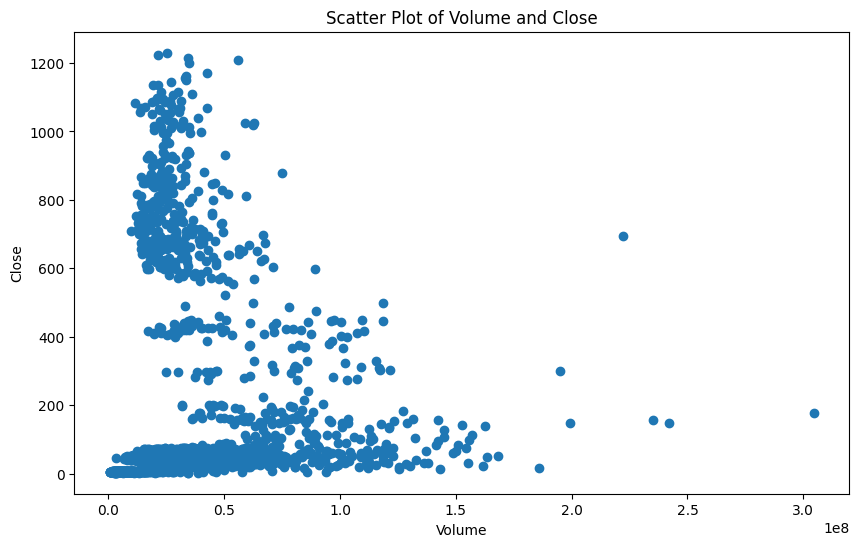

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Scatter Plot of Volume and Close')
plt.show()

In [98]:
monthly_avg = df['Close'].resample('M').mean()
monthly_avg.head()

Date
2010-06-30    4.772000
2010-07-31    3.911619
2010-08-31    3.902182
2010-09-30    4.148095
2010-10-31    4.142667
Freq: M, Name: Close, dtype: float64

In [99]:
monthly_avg.tail()

Date
2021-11-30    1120.662383
2021-12-31    1018.889990
2022-01-31    1010.168497
2022-02-28     878.884737
2022-03-31     869.838325
Freq: M, Name: Close, dtype: float64

In [100]:
from statsmodels.tsa.arima.model import ARIMA

In [101]:
model = ARIMA(monthly_avg, order=(2,1,3), seasonal_order=(0, 1, 0, 10))
results=model.fit()

In [102]:
forecast = results.forecast(steps=12)

forecast

2022-04-30     841.258542
2022-05-31     886.003329
2022-06-30     926.255829
2022-07-31     972.111153
2022-08-31    1093.458538
2022-09-30    1332.985601
2022-10-31    1228.606044
2022-11-30    1217.454271
2022-12-31    1083.903736
2023-01-31    1072.743259
2023-02-28    1042.191804
2023-03-31    1085.097724
Freq: M, Name: predicted_mean, dtype: float64

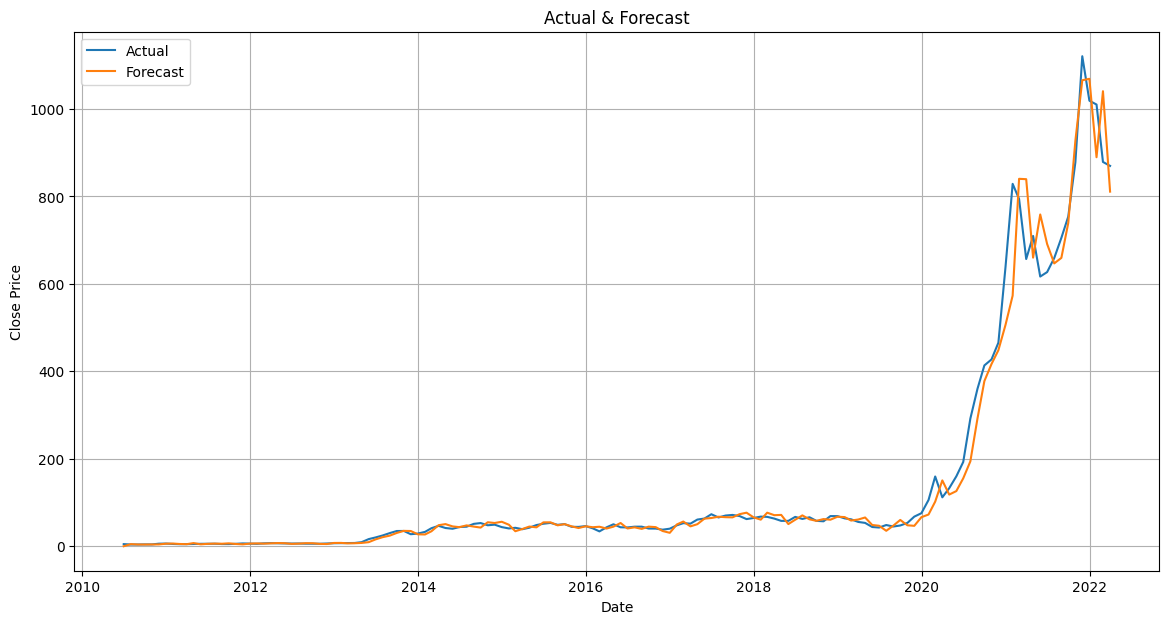

In [103]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg, label="Actual")
plt.plot(results.fittedvalues, label="Forecast")
plt.title("Actual & Forecast")
plt.xlabel("Date")
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

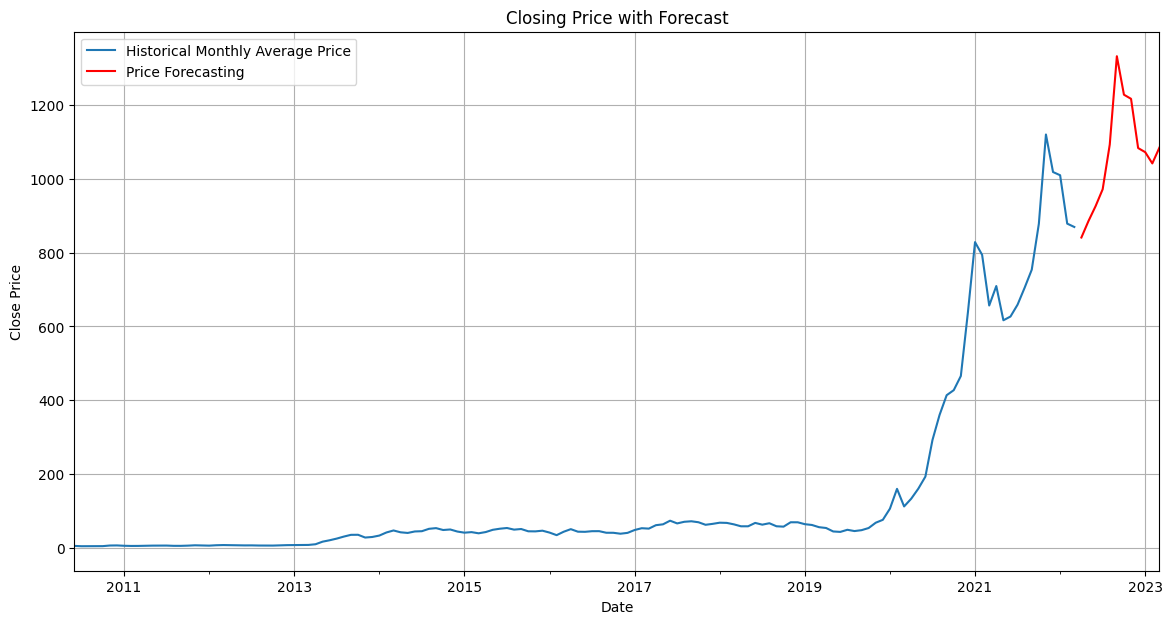

In [104]:
plt.figure(figsize=(14, 7))
monthly_avg.plot(label='Historical Monthly Average Price', legend=True)
forecast.plot(label='Price Forecasting', color='red', legend=True)
plt.title('Closing Price with Forecast')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [106]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

x_train = X.iloc[:2200]
x_test = X.iloc[2200:]
y_train = y.iloc[:2200]
y_test = y.iloc[2200:]

In [107]:
lr = LinearRegression()

In [108]:
lr.fit(x_train, y_train)

LinearRegression()

In [109]:
lr.score(x_train,y_train)

0.9997083633815301

In [110]:
lr.score(x_test,y_test)

0.999469292450729

In [111]:
y_pred=lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 64.17394681432636
R-squared: 0.999469292450729


<ipython-input-112-9fd805f2b432>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


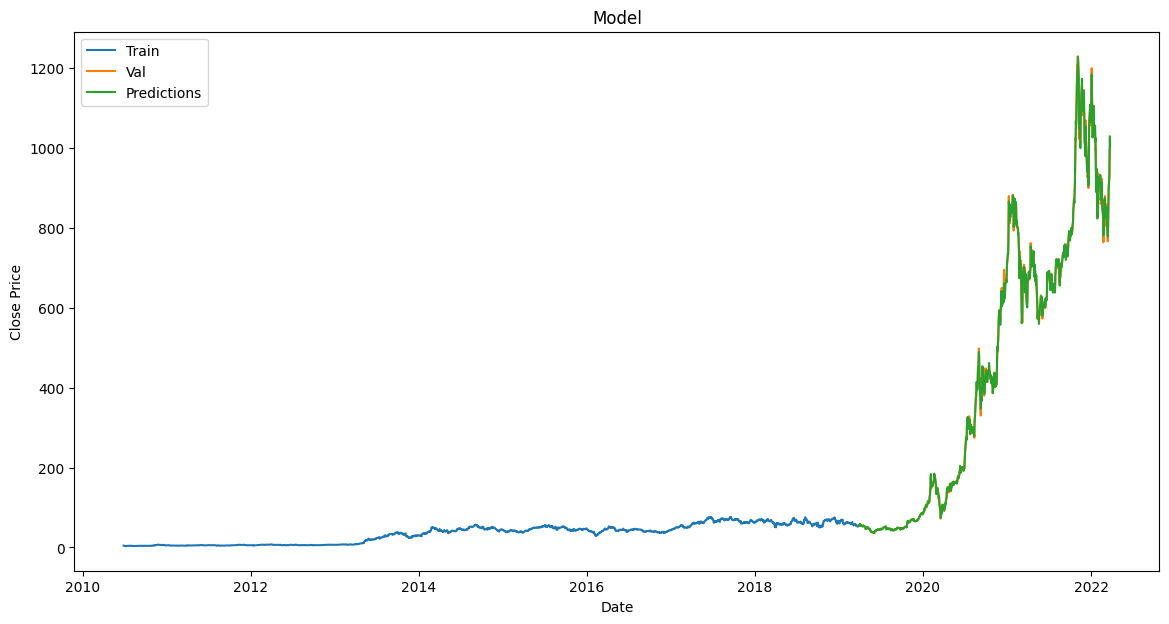

In [112]:
train = df[:2200]
valid = df[2200:]
valid['Predictions'] = y_pred

plt.figure(figsize=(14,7))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()